# Computational Analysis of Big Data - Final Project
# Notebook 2
## by Jill Brady & Ellie Packard

In [1]:
# import necessary modules 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## 0. Data

In [2]:
# import data downloaded from Kaggle dataset into a pandas df
column_names = ["FIRE_NAME", "FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "DISCOVERY_TIME", "CONT_DATE", 
                "CONT_DOY", "FIRE_SIZE", "FIRE_SIZE_CLASS", "OWNER_CODE", "OWNER_DESCR", "LATITUDE", "LONGITUDE", 
                "STATE", "COUNTY", "STAT_CAUSE_DESCR", "STAT_CAUSE_CODE"]
data1 = pd.read_csv("final.csv", index_col = None, header = None, names = column_names)
data2 = pd.read_csv("final2.csv", index_col = None, header = None, names = column_names)
data = data1.append(data2, ignore_index = True)
data.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,OWNER_CODE,OWNER_DESCR,LATITUDE,LONGITUDE,STATE,COUNTY,STAT_CAUSE_DESCR,STAT_CAUSE_CODE
0,FOUNTAIN,2005,2/2/05,33,1300.0,2/2/05,33.0,0.10,A,5,USFS,40.036944,-121.005833,CA,63,Miscellaneous,9
1,PIGEON,2004,5/12/04,133,845.0,5/12/04,133.0,0.25,A,5,USFS,38.933056,-120.404444,CA,61,Lightning,1
2,SLACK,2004,5/31/04,152,1921.0,5/31/04,152.0,0.10,A,13,STATE OR PRIVATE,38.984167,-120.735556,CA,17,Debris Burning,5
3,DEER,2004,6/28/04,180,1600.0,7/3/04,185.0,0.10,A,5,USFS,38.559167,-119.913333,CA,3,Lightning,1
4,STEVENOT,2004,6/28/04,180,1600.0,7/3/04,185.0,0.10,A,5,USFS,38.559167,-119.933056,CA,3,Lightning,1


## 1. Fire Trends
### Frequency of Fires Over Time 
[See Notebook 1]

### Over time, how has wildfire size (and damage) changed? 
[See Notebook 1]


### Over Time, have wildfires affected certain areas more? What geographical trends are occurring?

In [166]:
# find states with highest # of fires for all years
state_count = data.groupby(['STATE']).count()["FIRE_YEAR"].reset_index(name="# of Fires")
sorted_state_count = state_count.sort_values(by="# of Fires", ascending = False)
top_ten_states = sorted_state_count[:10]
count = top_ten_states["# of Fires"]
states = top_ten_states["STATE"]

Text(0.5, 1.0, 'Number of Fires Recorded in the Top Ten States from 1992-2015')

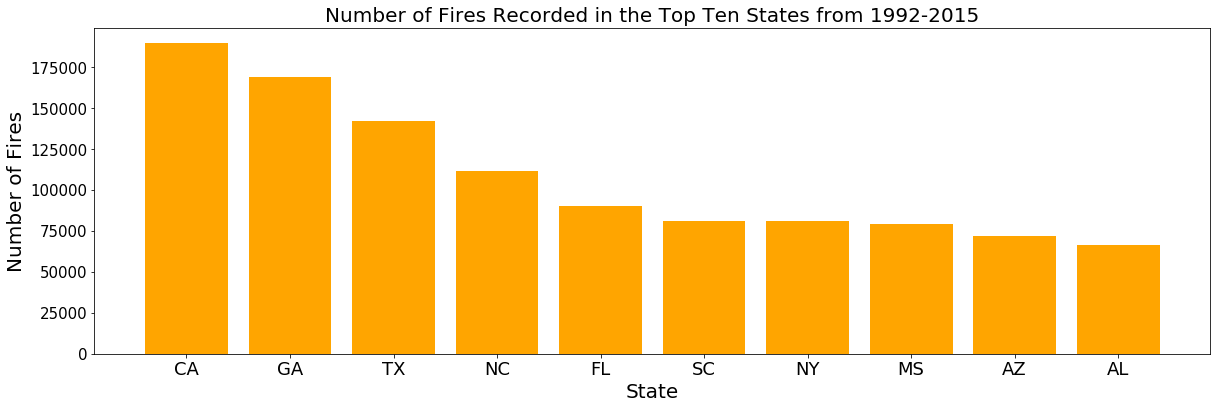

In [167]:
# plot states with highest # of fires for all years
plt.figure(figsize=(20, 6))
plt.bar(states, count, color="orange")
plt.xlabel("State", size="20")
plt.xticks(size="18")
plt.ylabel("Number of Fires", size="20")
plt.yticks(size="15")
plt.title("Number of Fires Recorded in the Top Ten States from 1992-2015", size="20")

In [73]:
# find states with highest # of fires for each year
state_fire_year = data[['STATE', 'FIRE_YEAR']]
top_states = []

for year in range(1992, 2016):
    labels = state_fire_year[state_fire_year['FIRE_YEAR']==year].index.tolist() 
    year_subset = state_fire_year.loc[labels, :] 
    agg_year_subset = year_subset.groupby('STATE').count()["FIRE_YEAR"].reset_index(name="# of Fires")
    sorted_subset = agg_year_subset.sort_values(by="# of Fires", ascending = False)
    top_entry = sorted_subset[:1]
    top_state = list(top_entry['STATE'])[0]
    top_states.append(top_state)

Text(0.5, 1.0, 'States with Highest Number of Fires from 1992-2015')

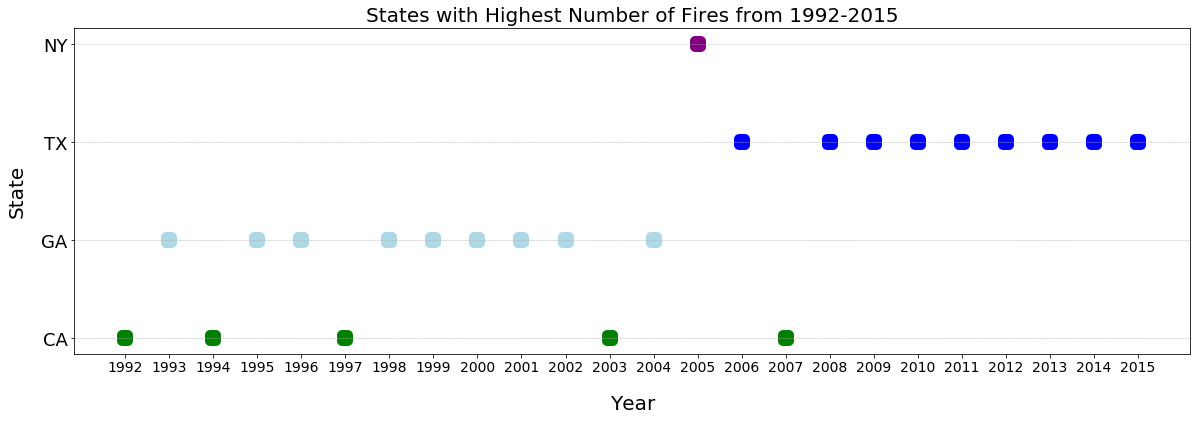

In [364]:
# plot states with highest # of fires with different colors
years = list(range(1992, 2016))
plt.figure(figsize=(20, 6))

ca_years, ca_list = [], []
ga_years, ga_list = [], []
ny_years, ny_list = [], []
tx_years, tx_list = [], []

for index in range(len(top_states)):
    state = top_states[index]
    if state=="CA":
        ca_years.append(years[index])
        ca_list.append(top_states[index])
    elif state=="GA":
        ga_years.append(years[index])
        ga_list.append(top_states[index])
    elif state=="TX":
        tx_years.append(years[index])
        tx_list.append(top_states[index])
    elif state=="NY":
        ny_years.append(years[index])
        ny_list.append(top_states[index])    

plt.scatter(ca_years, ca_list, linewidths='10', color='green', label="CA", marker='s')
plt.scatter(ga_years, ga_list, linewidths='10', color='lightblue', label="GA",  marker='s')
plt.scatter(tx_years, tx_list, linewidths='10', color='blue', label = "TX",  marker='s')
plt.scatter(ny_years, ny_list, linewidths='10', color='purple', label = "NY",  marker='s')
plt.xticks(size='14')
plt.xticks(np.arange(1992, 2016, step=1))
plt.xlabel('Year', size='20', labelpad=20)
plt.yticks(size='18')
plt.ylabel('State', size='20', labelpad=15)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.title("States with Highest Number of Fires from 1992-2015", size="20")

In [79]:
# standardize kaggle data by combining same ca county names

def get_county_name(name):
    if name in ['Alameda', 'ALAMEDA', '1', 1.0]:
        county_name = 'Alameda'
    elif name in ['Alpine', '3', 3.0]:
        county_name = 'Alpine'
    elif name in ['Amador', 'AMADOR', '5', 5.0]:
        county_name = 'Amador'
    elif name in ['Butte', 'BUTTE', '7', 7.0]:
        county_name = 'Butte'
    elif name in ['Calaveras', 'CALAVERAS', '9', 9.0]:
        county_name = 'Calaveras'
    elif name in ['Colusa', 'COLUSA', '11', 11.0]:
        county_name = 'Colusa'
    elif name in ['Contra Costa', 'CONTRA COSTA', '13', 13.0]:
        county_name = 'Contra Costa'
    elif name in ['Del Norte', 'DEL NORTE', '15', 15.0]:
        county_name = 'Del Norte'
    elif name in ['El Dorado', 'EL DORADO', '17', 17.0]:
        county_name = 'El Dorado'
    elif name in ['Fresno', 'FRESNO', '19', 19.0]:
        county_name = 'Fresno'
    elif name in ['Glenn', 'GLENN', '21', 21.0]:
        county_name = 'Glenn'
    elif name in ['Humboldt','Humbolt','Humboldt County','HUMBOLDT','23', 23.0]:
        county_name = 'Humboldt'
    elif name in ['Imperial','IMPERIAL', '25', 25.0]:
        county_name = 'Imperial'
    elif name in ['Inyo', 'INYO', '27', 27.0]:
        county_name = 'Inyo'
    elif name in ['Kern', 'KERN', 'KERN ', 'Kern County', '29', 29.0]:
        county_name = 'Kern'
    elif name in ['Kings','KINGS', '31', 31.0]:
        county_name = 'Kings'
    elif name in ['Lake', 'LAC', 'LAKE','33', 33.0]:
        county_name = 'Lake'
    elif name in ['Lassen', 'LASSEN','35', 35.0]:
        county_name = 'Lassen'
    elif name in ['Los Angeles', 'LOS ANGELES', '37', 37.0]:
        county_name = 'Los Angeles'
    elif name in ['Madera', 'Madera County','MADERA','39', 39.0]:
        county_name = 'Madera'
    elif name in ['Marin', 'MARIN','41', 41.0]:
        county_name = 'Marin'
    elif name in ['Mariposa','MARIPOSA', '43', 43.0]:
        county_name = 'Mariposa'
    elif name in ['Mendocino','MENDOCINO', '45', 45.0]:
        county_name = 'Mendocino'
    elif name in ['Merced','MERCED', '47', 47.0]:
        county_name = 'Merced'
    elif name in ['Modoc','MODOC', '49', 49.0]:
        county_name = 'Modoc'
    elif name in ['Mono', 'MONO', '51', 51.0]:
        county_name = 'Mono'
    elif name in ['Monterey','MONTEREY', 'Monterey County', '53', 53.0]:
        county_name = 'Monterey'
    elif name in ['Napa', 'NAPA','55', 55.0]:
        county_name = 'Napa'
    elif name in ['Nevada', 'NEVADA','57', 57.0]:
        county_name = 'Nevada'
    elif name in ['Orange','ORANGE','Orange ', 'Orange County', '59', 59.0]:
        county_name = 'Orange'
    elif name in ['Placer','PLACER', '61', 61.0]:
        county_name = 'Placer'
    elif name in ['Plumas','PLUMAS', '63', 63.0]:
        county_name = 'Plumas'
    elif name in ['Riverside','RIVERSIDE', 'Riverside ','Orange / Riverside', 'Riverside County','RIVERSIDE, SAN BRDNO','65', 65.0]:
        county_name = 'Riverside'
    elif name in ['Sacramento','SACRAMENTO', 'SACRAMENTO/AMADOR', '67', 67.0]:
        county_name = 'Sacramento'
    elif name in ['San Benito', 'SAN BENITO','69', 69.0]:
        county_name = 'San Benito'
    elif name in ['San Bernardino','SAN BERNARDINO','SAN BERNADINO', '71', 71.0]:
        county_name = 'San Bernardino'
    elif name in ['San Diego','SAN DIEGO','San Diego County', '73', 73.0]:
        county_name = 'San Diego'
    elif name in ['San Francisco','SAN FRANCISCO', '75', 75.0]:
        county_name = 'San Francisco'
    elif name in ['San Joaquin','SAN JOAQUIN', '77', 77.0]:
        county_name = 'San Joaquin'
    elif name in ['San Luis Obispo','SAN LUIS OBISPO', '79', 79.0]:
        county_name = 'San Luis Obispo'
    elif name in ['San Mateo', 'SAN MATEO', '81', 81.0]:
        county_name = 'San Mateo'
    elif name in ['Santa Barbara','SANTA BARBARA', 'Santa Barbara County', '83', 83.0]:
        county_name = 'Santa Barbara'
    elif name in ['Santa Clara', 'SANTA CLARA', 'Santa Clara (See 44)', '85', 85.0]:
        county_name = 'Santa Clara'
    elif name in ['Santa Cruz', 'SANTA CRUZ', '87', 87.0]:
        county_name = 'Santa Cruz'
    elif name in ['Shasta','SHASTA', '89', 89.0]:
        county_name = 'Shasta'
    elif name in ['Sierra','SIERRA', '91', 91.0]:
        county_name = 'Sierra'
    elif name in ['Siskiyou','SISKIYOU', '93', 93.0]:
        county_name = 'Siskiyou'
    elif name in ['Solano', 'SOLANO','95', 95.0]:
        county_name = 'Solano'
    elif name in ['Sonoma', 'SONOMA','LAKE - SONOMA','97', 97.0]:
        county_name = 'Sonoma'
    elif name in ['Stanislaus', 'STANISLAUS','99', 99.0]:
        county_name = 'Stanislaus'
    elif name in ['Sutter', 'SUTTER','101', 101.0]:
        county_name = 'Sutter'
    elif name in ['Tehama', 'TEHAMA','TEHAMA ','103', 103.0]:
        county_name = 'Tehama'
    elif name in ['Trinity','TRINITY','Trinity County', '105', 105.0]:
        county_name = 'Trinity'
    elif name in ['Tulare', 'TULARE','107', 107.0]:
        county_name = 'Tulare'
    elif name in ['Tuolumne','TUOLUMNE', '109', 109.0]:
        county_name = 'Tuolumne'
    elif name in ['Ventura', 'VENTURA', 'Ventura ', 'Ventura County','111', 111.0]:
        county_name = 'Ventura'
    elif name in ['Yolo', 'YOLO','113', 113.0]:
        county_name = 'Yolo'
    elif name in ['Yuba','YUBA', '115', 115.0]:
        county_name = 'Yuba'
    else:
        county_name = name
        
    return county_name

In [81]:
# combine same counties with different labels in the dataset
state_county_year = data[['STATE', 'COUNTY', 'FIRE_YEAR']]
ca_labels = state_county_year[state_county_year['STATE']=='CA'].index.tolist() 
ca_subset = state_county_year.loc[ca_labels, :] 
ca_subset = ca_subset.reset_index()
for index in range(ca_subset.shape[0]):
    c_name = ca_subset.iloc[index]['COUNTY']
    new_c_name = get_county_name(c_name)
    ca_subset.at[index, 'COUNTY'] = new_c_name

In [82]:
# find top ten ca counties with highest # of fires over all the years
most_freq_ca_counties = ca_subset.groupby('COUNTY').count()["FIRE_YEAR"].reset_index(name="# of Fires")
sorted_freq_ca = most_freq_ca_counties.sort_values(by="# of Fires", ascending = False)
top_ten_ca_counties= sorted_freq_ca[:10]
ca_counties = list(top_ten_ca_counties["COUNTY"])
ca_fire_num = list(top_ten_ca_counties["# of Fires"])

Text(0.5, 1.0, 'Number of Fires Recorded in the Top Ten Counties of California from 1992-2015')

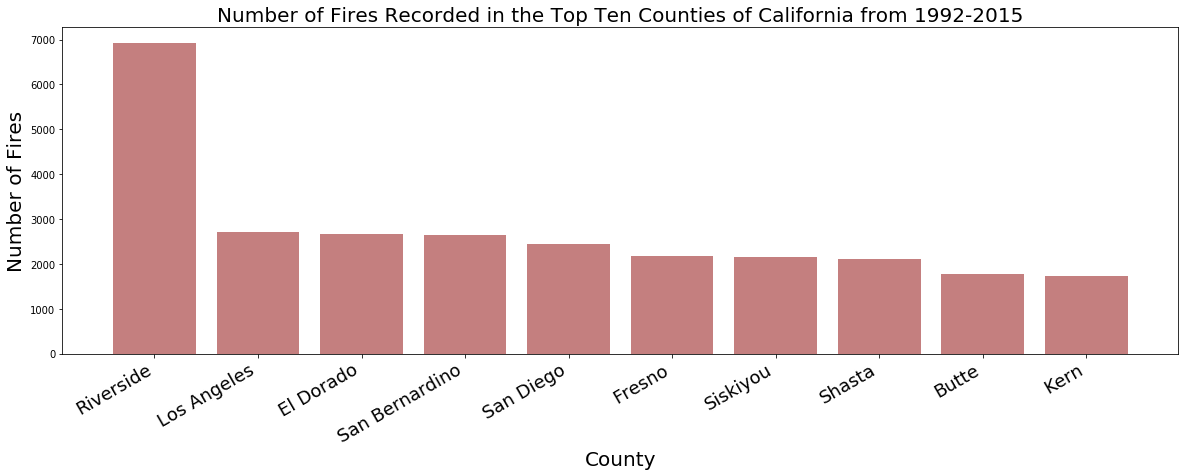

In [83]:
# find top ten ca counties with highest # of fires over all the years
plt.figure(figsize=(20, 6))
plt.bar(ca_counties, ca_fire_num, color="darkred", alpha=0.5)
plt.xlabel("County", size="20")
plt.xticks(size="18", rotation=30, ha='right')
plt.ylabel("Number of Fires", size="20")
plt.yticks(size="10")
plt.title("Number of Fires Recorded in the Top Ten Counties of California from 1992-2015", size="20")

In [86]:
# find ca counties with highest # of fires for each year
top_counties = []

for year in range(1998, 2016):
    labels = ca_subset[ca_subset['FIRE_YEAR']==year].index.tolist() 
    year_subset = ca_subset.loc[labels, :] 
    agg_year_subset = year_subset.groupby('COUNTY').count()["FIRE_YEAR"].reset_index(name="# of Fires")
    sorted_subset = agg_year_subset.sort_values(by="# of Fires", ascending = False)
    top_entry = sorted_subset[:1]
    top_county = list(top_entry['COUNTY'])[0]
    top_counties.append(top_county)

Text(0.5, 1.0, 'CA Counties with Highest Number of Fires from 1998-2015')

<Figure size 1440x432 with 0 Axes>

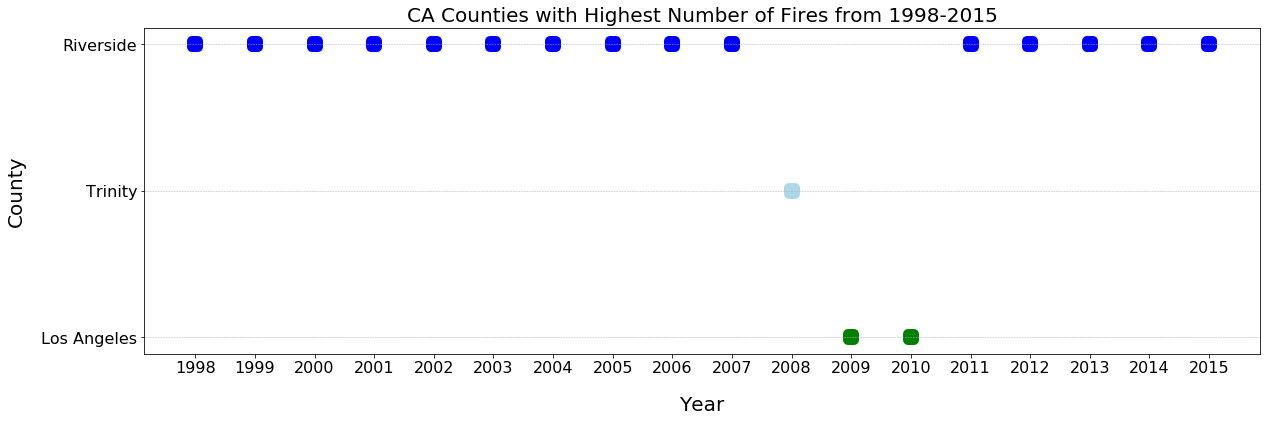

In [87]:
# plot ca counties with highest # of fires 
county_years = list(range(1998, 2016))
la_years, la_list = [], []
trin_years, trin_list = [], []
river_years, river_list = [], []

for index in range(len(top_counties)):
    county = top_counties[index]
    if county=='Los Angeles':
        la_years.append(county_years[index])
        la_list.append(top_counties[index])
    elif county=='Trinity':
        trin_years.append(county_years[index])
        trin_list.append(top_counties[index])
    elif county=='Riverside':
        river_years.append(county_years[index])
        river_list.append(top_counties[index])
        
plt.figure(figsize=(20, 6))
plt.scatter(la_years, la_list, linewidths='10', color='green', marker='s')
plt.scatter(trin_years, trin_list, linewidths='10', color='lightblue', marker='s')
plt.scatter(river_years, river_list, linewidths='10', color='blue',  marker='s')
plt.xticks(np.arange(1998, 2016, step=1))
plt.xticks(size='16')
plt.yticks(size='16')
plt.xlabel('Year', size='20', labelpad=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.ylabel('County', size='20', labelpad=15)
plt.title("CA Counties with Highest Number of Fires from 1998-2015", size="20")

### How have fire seasons changed over time? 

In [91]:
# find average discovery and containment date of fires for each year
disc_dates = data.groupby('FIRE_YEAR').mean()["DISCOVERY_DOY"].reset_index(name="average")
cont_dates = data.groupby('FIRE_YEAR').mean()["CONT_DOY"].reset_index(name="average")
avg_disc_dates = disc_dates["average"]
avg_cont_dates = cont_dates["average"]
years = disc_dates["FIRE_YEAR"]

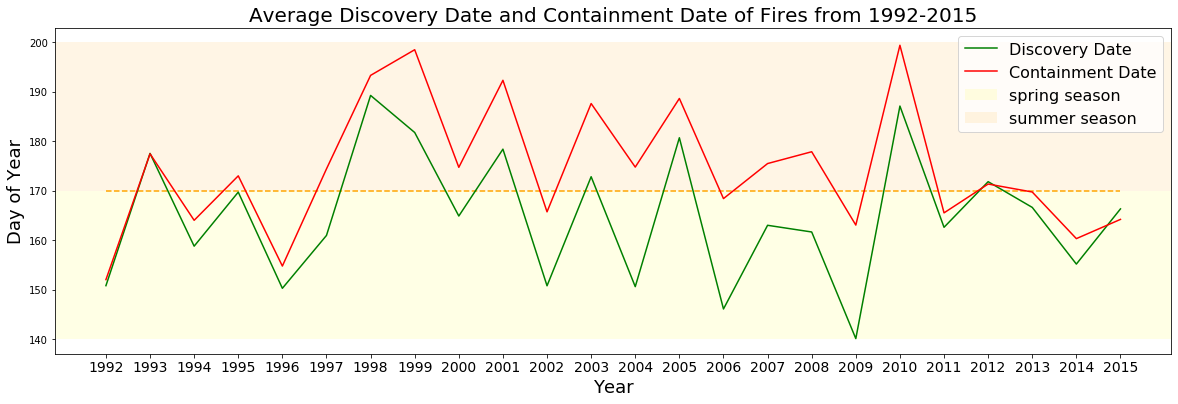

In [381]:
# plot average discovery and containment date of fires for each year
plt.figure(figsize=(20, 6))
plt.plot(years, avg_disc_dates, color="green", label="Discovery Date")
plt.xlabel("Year", size="18")
plt.xticks(np.arange(1992, 2016, step=1))
plt.ylabel("Day of Year", size="18")
plt.xticks(size="14")
plt.title("Average Discovery Date of Fires from 1992-2015", size="20")

plt.plot(years, avg_cont_dates, color="red", label="Containment Date")
plt.xlabel("Year", size="18")
plt.xticks(size="14")
plt.xticks(np.arange(1992, 2016, step=1))
plt.title("Average Discovery Date and Containment Date of Fires from 1992-2015", size="20")
plt.hlines(170, 1992, 2015, linestyles='dashed', color = 'orange')
plt.axhspan(140, 170, facecolor='yellow', alpha=0.1, label = "spring season")
plt.axhspan(170, 200, facecolor='orange', alpha=0.1, label = "summer season")
plt.legend(fontsize="16", loc="upper right")

In [93]:
# find difference between avergage discovery and containment date for each year
disc_list = list(avg_disc_dates)
cont_list = list(avg_cont_dates)
diff = []
for ind in range(len(disc_list)):
    start_date = disc_list[ind]
    end_date = cont_list[ind]
    diff.append(end_date-start_date)

Text(0.5, 1.0, 'Difference between Average Discovery Date and Containment Date of Fires from 1992-2015')

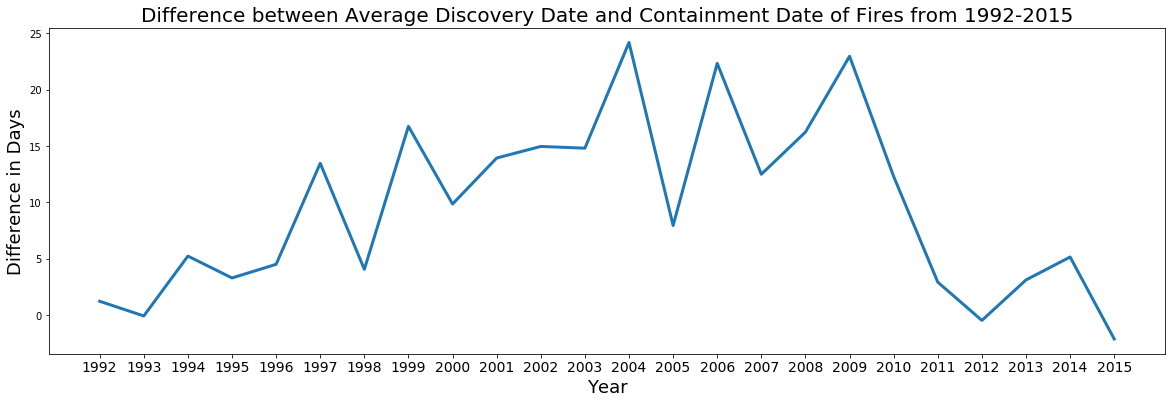

In [96]:
# plot difference between avergage discovery and containment date for each year
plt.figure(figsize=(20, 6))
plt.plot(years, diff, linewidth=3)
plt.xlabel("Year", size="18")
plt.ylabel("Difference in Days", size="18")
plt.xticks(size="14")
plt.xticks(np.arange(1992, 2016, step=1))
plt.title("Difference between Average Discovery Date and Containment Date of Fires from 1992-2015", size="20")

## Part 2. Geographic Interactive Map 
[See Notebook 1]

## Part 3. Relationships between Fire Factors

### Land Owner

In [25]:
# find top ten owners of land where fires occur
owner_desc = data.groupby('OWNER_DESCR').count()["FIRE_YEAR"].reset_index(name="count")
sorted_owners = owner_desc.sort_values(by="count", ascending = False)
top_ten_o = sorted_owners[:10]
top_ten_o

,OWNER_DESCR,count
6,MISSING/NOT SPECIFIED,1050835
10,PRIVATE,314822
15,USFS,188338
0,BIA,106819
12,STATE OR PRIVATE,71881
1,BLM,63278
11,STATE,30790
8,NPS,17524
5,FWS,12191
13,TRIBAL,8952


In [26]:
# remove row of missing owners
top_ten_o = top_ten_o[1:]

Text(0.5, 1.0, 'Owners of Land Affected by Fires')

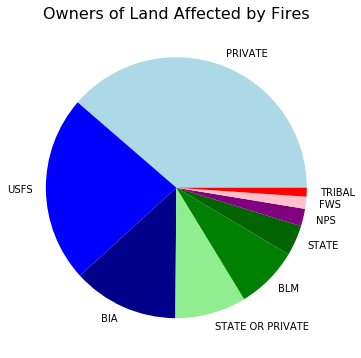

In [386]:
# plot top owners of land where fires occur
owner_list = list(top_ten_o['OWNER_DESCR'])
owner_count = list(top_ten_o['count'])
colors = ['lightblue', 'blue', 'darkblue', 'lightgreen', 'green', 'darkgreen', 'purple', 'pink', 'red', 'darkred']

plt.figure(figsize=(20, 6))
plt.pie(owner_count, labels = owner_list, radius=1, colors=colors)
plt.title("Owners of Land Affected by Fires", size="16")

In [419]:
# extract subsets of data based on owner type 
all_owners = data.groupby(['OWNER_DESCR', 'FIRE_SIZE_CLASS']).count()["FIRE_YEAR"].reset_index(name="count")

private_labels = all_owners[all_owners['OWNER_DESCR']=='PRIVATE'].index.tolist() 
usfs_labels = all_owners[all_owners['OWNER_DESCR']=='USFS'].index.tolist() 
bia_labels = all_owners[all_owners['OWNER_DESCR']=='BIA'].index.tolist() 
sp_labels = all_owners[all_owners['OWNER_DESCR']=='STATE OR PRIVATE'].index.tolist()
blm_labels = all_owners[all_owners['OWNER_DESCR']=='BLM'].index.tolist()
state_labels = all_owners[all_owners['OWNER_DESCR']=='STATE'].index.tolist()
nps_labels = all_owners[all_owners['OWNER_DESCR']=='NPS'].index.tolist()
fws_labels = all_owners[all_owners['OWNER_DESCR']=='FWS'].index.tolist()
tribal_labels = all_owners[all_owners['OWNER_DESCR']=='TRIBAL'].index.tolist()

private_subset = all_owners.loc[private_labels, :]
usfs_subset = all_owners.loc[usfs_labels, :] 
bia_subset = all_owners.loc[bia_labels, :] 
sp_subset = all_owners.loc[sp_labels, :] 
blm_subset = all_owners.loc[blm_labels, :] 
state_subset = all_owners.loc[state_labels, :] 
nps_subset = all_owners.loc[nps_labels, :] 
fws_subset = all_owners.loc[fws_labels, :] 
tribal_subset = all_owners.loc[tribal_labels, :] 

In [420]:
# count number of each fire class type for each owner
fire_classes = private_subset["FIRE_SIZE_CLASS"]
private_count = private_subset["count"]
usfs_count = usfs_subset["count"]
bia_count = bia_subset["count"]
sp_count = sp_subset["count"]
blm_count = blm_subset["count"]
state_count = state_subset["count"]
nps_count = nps_subset["count"]
fws_count = fws_subset["count"]
tribal_count = tribal_subset["count"]

all_counts = list(top_ten_o["count"])
all_private = all_counts[0]
all_usfs = all_counts[1]
all_bia = all_counts[2]
all_sp = all_counts[3]
all_blm = all_counts[4]
all_state = all_counts[5]
all_nps = all_counts[6]
all_fws = all_counts[7]
all_tribal = all_counts[8]

Text(0.5, 1.0, 'Proportion of Fire Size Classes by Land Owner')

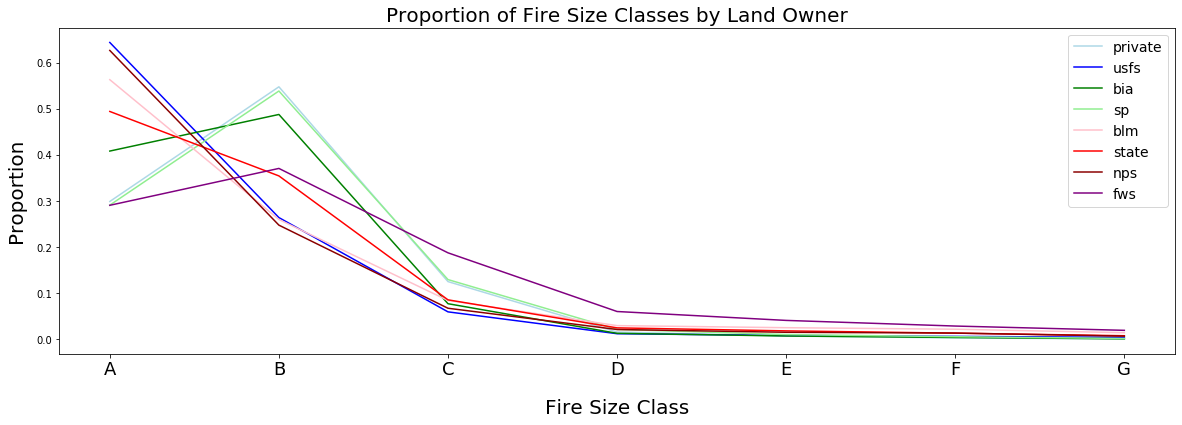

In [421]:
# plot proportion of each fire class type for each land owner
plt.figure(figsize=(20, 6))

plt.plot(fire_classes, (private_count/all_private), color="lightblue", label='private')
plt.plot(fire_classes, (usfs_count/all_usfs), color="blue",  label='usfs')
plt.plot(fire_classes, (bia_count/all_bia), color="green",  label='bia')
plt.plot(fire_classes, (sp_count/all_sp), color="lightgreen",  label='sp')
plt.plot(fire_classes, (blm_count/all_blm), color="pink",  label='blm')
plt.plot(fire_classes, (state_count/all_state), color="red",  label='state')
plt.plot(fire_classes, (nps_count/all_nps), color="darkred",  label='nps')
plt.plot(fire_classes, (fws_count/all_fws), color="purple",  label='fws')

plt.xlabel("Fire Size Class", size="20", labelpad = 20)
plt.ylabel("Proportion", size="20", labelpad=10)
plt.xticks(size="18")
plt.legend(fontsize="14")
plt.title("Proportion of Fire Size Classes by Land Owner", size="20")

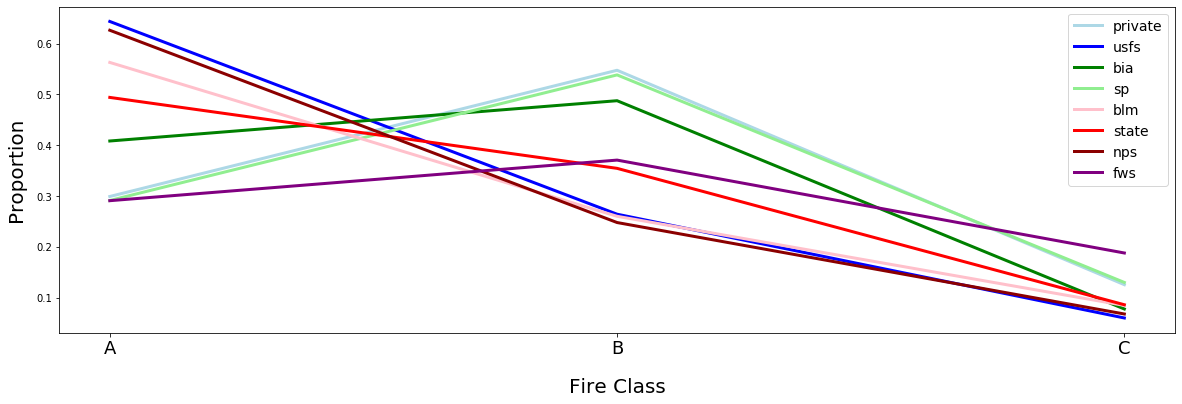

In [422]:
# plot proportion of smaller fire class types for each land owner
plt.figure(figsize=(20, 6))

plt.plot(fire_classes[0:3], (private_count/all_private)[0:3], color="lightblue", label='private', linewidth='3')
plt.plot(fire_classes[0:3], (usfs_count/all_usfs)[0:3], color="blue",  label='usfs', linewidth='3')
plt.plot(fire_classes[0:3], (bia_count/all_bia)[0:3], color="green",  label='bia', linewidth='3')
plt.plot(fire_classes[0:3], (sp_count/all_sp)[0:3], color="lightgreen",  label='sp', linewidth='3')
plt.plot(fire_classes[0:3], (blm_count/all_blm)[0:3], color="pink",  label='blm', linewidth='3')
plt.plot(fire_classes[0:3], (state_count/all_state)[0:3], color="red",  label='state', linewidth='3')
plt.plot(fire_classes[0:3], (nps_count/all_nps)[0:3], color="darkred",  label='nps', linewidth='3')
plt.plot(fire_classes[0:3], (fws_count/all_fws)[0:3], color="purple",  label='fws', linewidth='3')

plt.xlabel("Fire Class", size="20", labelpad = 20)
plt.ylabel("Proportion", size="20", labelpad=10)
plt.xticks(size="18")

plt.legend(fontsize="14")

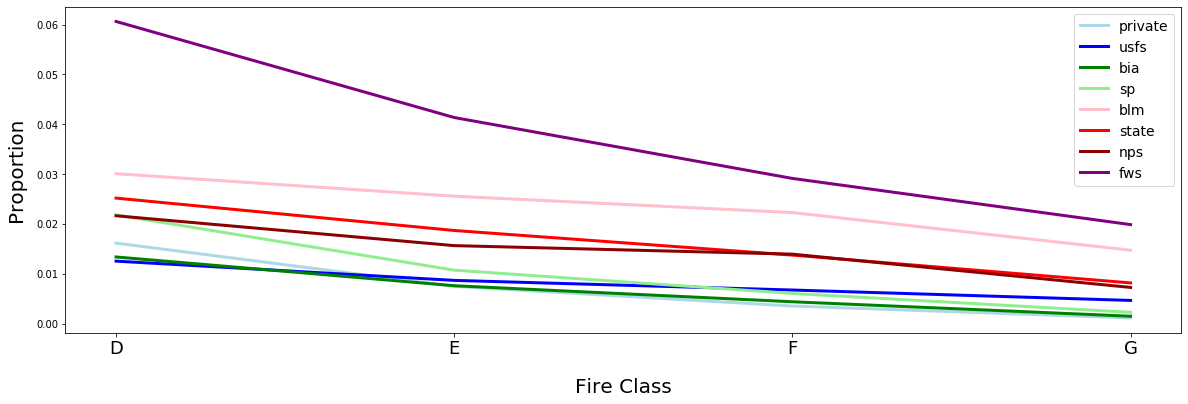

In [423]:
# plot proportion of larger fire class types for each land owner
plt.figure(figsize=(20, 6))

plt.plot(fire_classes[3:], (private_count/all_private)[3:], color="lightblue", label='private', linewidth='3')
plt.plot(fire_classes[3:], (usfs_count/all_usfs)[3:], color="blue",  label='usfs', linewidth='3')
plt.plot(fire_classes[3:], (bia_count/all_bia)[3:], color="green",  label='bia', linewidth='3')
plt.plot(fire_classes[3:], (sp_count/all_sp)[3:], color="lightgreen",  label='sp', linewidth='3')
plt.plot(fire_classes[3:], (blm_count/all_blm)[3:], color="pink",  label='blm', linewidth='3')
plt.plot(fire_classes[3:], (state_count/all_state)[3:], color="red",  label='state', linewidth='3')
plt.plot(fire_classes[3:], (nps_count/all_nps)[3:], color="darkred",  label='nps', linewidth='3')
plt.plot(fire_classes[3:], (fws_count/all_fws)[3:], color="purple",  label='fws', linewidth='3')

plt.xlabel("Fire Class", size="20", labelpad = 20)
plt.ylabel("Proportion", size="20", labelpad=10)
plt.xticks(size="18")

plt.legend(fontsize="14")

### Cause

In [99]:
# count number of fires for each cause type
cause_types = data.groupby('STAT_CAUSE_DESCR').count()["FIRE_YEAR"].reset_index(name="count")
cause_types = cause_types.sort_values(by="count", ascending = False)
cause_types 

,STAT_CAUSE_DESCR,count
3,Debris Burning,429028
7,Miscellaneous,323805
0,Arson,281455
6,Lightning,278468
8,Missing/Undefined,166723
4,Equipment Use,147612
1,Campfire,76139
2,Children,61167
11,Smoking,52869
10,Railroad,33455


In [100]:
# remove miscellaneous and missing/undefined cause types
short_cause_types = cause_types.drop(7)
short_cause_types = short_cause_types.drop(8)
short_cause_types

,STAT_CAUSE_DESCR,count
3,Debris Burning,429028
0,Arson,281455
6,Lightning,278468
4,Equipment Use,147612
1,Campfire,76139
2,Children,61167
11,Smoking,52869
10,Railroad,33455
9,Powerline,14448
5,Fireworks,11500


Text(0.5, 1.0, 'Distribution of Fire Causes from 1992-2015')

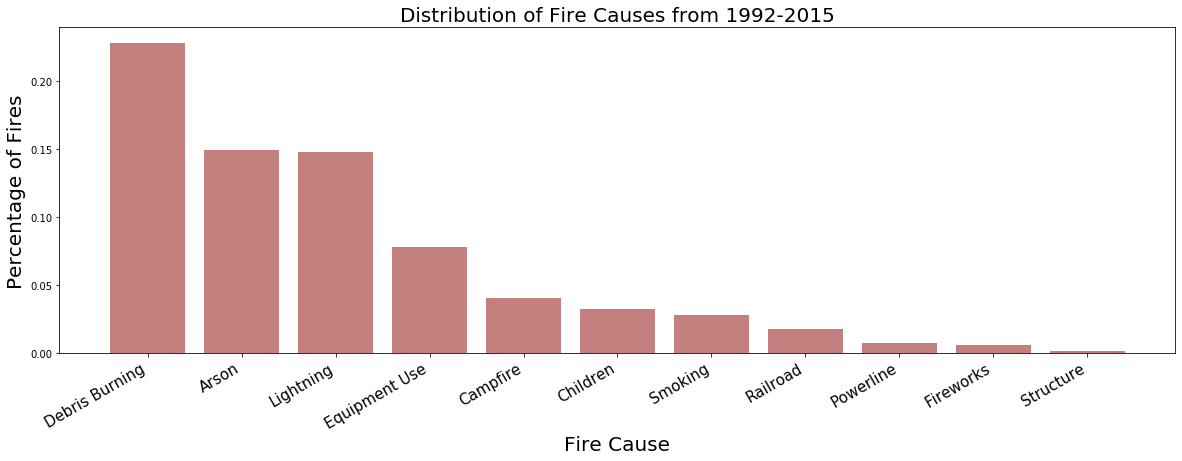

In [101]:
# calculate and plot ditribution of fire cause types for all years
cause = short_cause_types["STAT_CAUSE_DESCR"]
count = short_cause_types["count"]
total_count = cause_types["count"]
total_cause_count = sum(list(total_count))

plt.figure(figsize=(20, 6))
plt.bar(cause, (count/total_cause_count), color="darkred", alpha = 0.5)
plt.xticks(rotation=30, ha='right', size="15")
plt.xlabel("Fire Cause", size="20")
plt.ylabel("Percentage of Fires", size="20")
plt.title("Distribution of Fire Causes from 1992-2015", size="20")

## Part 4. Which Communities are Affected the Most? Exploring Correlations 

# Most Frequent Fire Class by CA County 

In [400]:
# combine same counties with different labels in the dataset
state_county_class = data[['STATE', 'COUNTY', 'FIRE_SIZE_CLASS']]
ca_class_labels = state_county_class[state_county_class['STATE']=='CA'].index.tolist() 
ca_class_subset = state_county_class.loc[ca_class_labels, :] 
ca_class_subset = ca_class_subset.reset_index()
for index in range(ca_class_subset.shape[0]):
    c_name = ca_class_subset.iloc[index]['COUNTY']
    new_c_name = get_county_name(c_name)
    ca_class_subset.at[index, 'COUNTY'] = new_c_name

In [401]:
# find most frequent fire class for each county
ca_fire_classes = ca_class_subset.groupby(['COUNTY', 'FIRE_SIZE_CLASS']).count()['STATE'].reset_index(name="count")
counties = list(ca_fire_classes["COUNTY"])
classes = list(ca_fire_classes['FIRE_SIZE_CLASS'])
counts = list(ca_fire_classes["count"])

all_county_names = sorted(list(set(counties)))
all_county_names.remove('Douglas')
most_freq_classes = []

for name in all_county_names:
    all_tups = []
    for index in range(len(counties)):
        if counties[index] == name:
            this_class = classes[index]
            count = counts[index]
            new_tup = (count, this_class)
            all_tups.append(new_tup)
    sorted_all_tups = sorted(all_tups, reverse=True)
    most_freq_class = sorted_all_tups[0][1]
    most_freq_classes.append(most_freq_class)

In [402]:
# convert resulting lists back into df 
county_class_list = []
for index in range(len(all_county_names)):
    county = all_county_names[index]
    this_class = most_freq_classes[index]
    county_class_list.append([county, this_class])

fire_class = pd.DataFrame(county_class_list, columns = ['County' , 'Most Frequent Fire Class'])
fire_class

,County,Most Frequent Fire Class
0,Alameda,A
1,Alpine,A
2,Amador,A
3,Butte,A
4,Calaveras,A
5,Colusa,B
6,Contra Costa,A
7,Del Norte,A
8,El Dorado,A
9,Fresno,B


# Most Frequent Fire Cause by CA County

In [403]:
# combine same counties with different labels in the dataset
state_county_cause = data[['STATE', 'COUNTY', 'STAT_CAUSE_DESCR']]
ca_cause_labels = state_county_cause[state_county_cause['STATE']=='CA'].index.tolist() 
ca_cause_subset = state_county_cause.loc[ca_cause_labels, :] 
ca_cause_subset = ca_cause_subset.reset_index()
for index in range(ca_cause_subset.shape[0]):
    c_name = ca_cause_subset.iloc[index]['COUNTY']
    new_c_name = get_county_name(c_name)
    ca_cause_subset.at[index, 'COUNTY'] = new_c_name

In [404]:
# find most frequent fire cause for each county
ca_fire_causes = ca_cause_subset.groupby(['COUNTY', 'STAT_CAUSE_DESCR']).count()['STATE'].reset_index(name="count")
counties = list(ca_fire_causes["COUNTY"])
causes = list(ca_fire_causes['STAT_CAUSE_DESCR'])
counts = list(ca_fire_causes["count"])

all_county_names = sorted(list(set(counties)))
all_county_names.remove('Douglas')
most_freq_causes = []

for name in all_county_names:
    all_tups = []
    for index in range(len(counties)):
        if counties[index] == name:
            cause = causes[index]
            count = counts[index]
            new_tup = (count, cause)
            all_tups.append(new_tup)
    sorted_all_tups = sorted(all_tups, reverse=True)
    most_freq_cause = sorted_all_tups[0][1]
    if most_freq_cause == 'Missing/Undefined' or most_freq_cause == 'Miscellaneous':
        most_freq_cause = sorted_all_tups[1][1]
    if most_freq_cause == 'Missing/Undefined' or most_freq_cause == 'Miscellaneous':
        most_freq_cause = sorted_all_tups[2][1]
    if most_freq_cause == 'Missing/Undefined' or most_freq_cause == 'Miscellaneous':
        most_freq_cause = sorted_all_tups[3][1]
    most_freq_causes.append(most_freq_cause)

In [405]:
# convert resulting lists back into df 
county_cause_list = []
for index in range(len(all_county_names)):
    county = all_county_names[index]
    cause = most_freq_causes[index]
    county_cause_list.append([county, cause])

fire_cause = pd.DataFrame(county_cause_list, columns = ['County' , 'Most Frequent Fire Cause'])
fire_cause

,County,Most Frequent Fire Cause
0,Alameda,Equipment Use
1,Alpine,Lightning
2,Amador,Arson
3,Butte,Arson
4,Calaveras,Equipment Use
5,Colusa,Equipment Use
6,Contra Costa,Arson
7,Del Norte,Lightning
8,El Dorado,Equipment Use
9,Fresno,Lightning


# 2018 Income Rank of CA Counties

In [424]:
# read income data from csv file and sort alphabetically by county name
income_data = pd.read_csv("income.csv", index_col = None, header = None, names = ["COUNTY","INCOME_RANK"])
ca_rank = income_data.sort_values(by="COUNTY")
ca_rank

,COUNTY,INCOME_RANK
0,Alameda,6
1,Alpine,8
2,Amador,40
3,Butte,42
4,Calaveras,30
5,Colusa,31
6,Contra Costa,5
7,Del Norte,56
8,El Dorado,11
9,Fresno,45


# Average Fire Duration by CA County

In [252]:
# Average Fire Duration by County
duration = data[['STATE', 'COUNTY', 'DISCOVERY_DOY', 'CONT_DOY']]
ca_labels_dur = duration[duration["STATE"]=="CA"].index.tolist() 
ca_subset_dur = duration.loc[ca_labels_dur, :] 

In [253]:
ca_subset_dur

,STATE,COUNTY,DISCOVERY_DOY,CONT_DOY
0,CA,63,33,33.0
1,CA,61,133,133.0
2,CA,17,152,152.0
3,CA,3,180,185.0
4,CA,3,180,185.0
5,CA,5,182,183.0
6,CA,17,183,184.0
7,CA,NaN,67,67.0
8,CA,NaN,74,74.0
9,CA,5,183,184.0


In [254]:
# calculate difference between discovery and containment dates
dur_counties = list(ca_subset_dur['COUNTY'])
disc_doys = list(ca_subset_dur['DISCOVERY_DOY'])
cont_doys = list(ca_subset_dur['CONT_DOY'])
durations = [] 

for index in range(len(disc_doys)):
    disc_doy = disc_doys[index]
    cont_doy = cont_doys[index]
    dur = cont_doy - disc_doy
    durations.append(dur)
    
county_dur_list = []
for index in range(len(durations)):
    county = dur_counties[index]
    dur = durations[index]
    county_dur_list.append([county, dur])

In [255]:
# create new data frame with results 
dur_df = pd.DataFrame(county_dur_list, columns = ['COUNTY' , 'FIRE_DURATION'])

In [256]:
# replace county names 
for index in range(dur_df.shape[0]):
    c_name = dur_df.iloc[index]['COUNTY']
    new_c_name = get_county_name(c_name)
    dur_df.at[index, 'COUNTY'] = new_c_name

In [258]:
# group and sort dataframe alphabetically by county name
dur_grouped = dur_df.groupby('COUNTY').mean()['FIRE_DURATION'].reset_index(name="average")
fire_duration = dur_grouped.sort_values(by="COUNTY")

In [259]:
fire_duration.shape[0]

59

In [260]:
# Remove Douglas entry
fire_duration = fire_duration.drop([8], axis = 0)

In [261]:
fire_duration.shape[0]

58

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <a list of 9 Text yticklabel objects>)

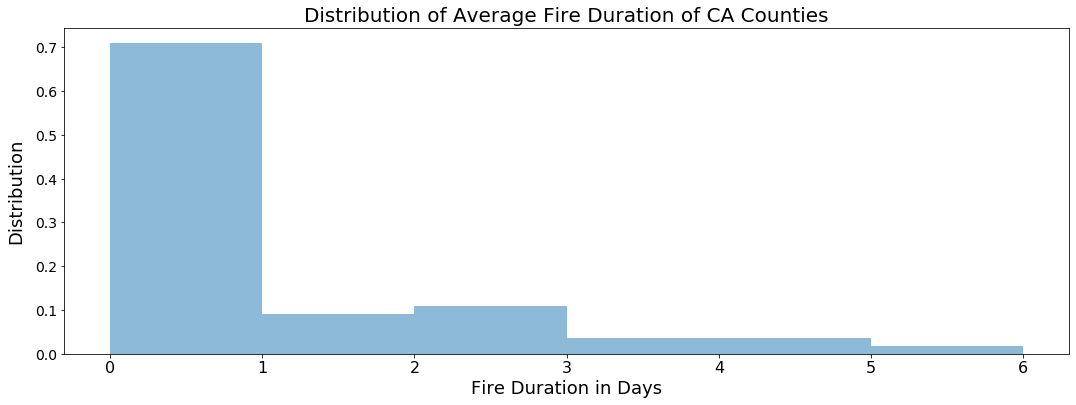

In [380]:
# plot average fire duration of each county
dur_averages = list(fire_duration['average'])
plt.figure(figsize=(18,6))
plt.hist(dur_averages, density=True, bins=range(0, 7), alpha=0.5)
plt.title("Distribution of Average Fire Duration of CA Counties", size="20")
plt.xlabel("Fire Duration in Days", size="18")
plt.xticks(size="16")
plt.ylabel("Distribution", size = "18", labelpad=10)
plt.yticks(size="14")


# Correlations of All Factors by CA County

In [408]:
# convert data frames into lists
durations = list(fire_duration['average'])
fire_classes = list(fire_class['Most Frequent Fire Class'])
fire_causes = list(fire_cause['Most Frequent Fire Cause'])
income_ranks = list(ca_rank['INCOME_RANK'])
ca_county_list = list(ca_rank['COUNTY'])

In [417]:
# understand values from factorization 
factorized = pd.factorize(fire_causes, sort=True)
print(factorized)

(array([3, 4, 0, 0, 3, 3, 0, 4, 3, 4, 4, 0, 3, 4, 3, 3, 3, 4, 3, 4, 0, 3,
       2, 2, 4, 4, 3, 3, 3, 0, 3, 4, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0,
       4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3]), array(['Arson', 'Children', 'Debris Burning', 'Equipment Use',
       'Lightning'], dtype=object))


In [412]:
# create dataframe of numeric values for correlation
numeric_factors = []
for index in range(len(ca_county_list)):
    county_factor_list=[income_ranks[index], durations[index]]
    numeric_factors.append(county_factor_list)
    
numeric_df = pd.DataFrame(numeric_factors, columns = ['Income Rank','Average Duration'])
numeric_df.head()

,Income Rank,Average Duration
0,6,0.043478
1,8,2.103659
2,40,0.193089
3,42,0.656069
4,30,0.161998


In [397]:
numeric_df.corr() 

,Income Rank,Average Duration
Income Rank,1.000000,0.032221
Average Duration,0.032221,1.000000


In [414]:
# create dataframe of non-numeric values for correlation
non_numeric_factors = []

for index in range(len(ca_county_list)):
    county_factor_list=[income_ranks[index], fire_classes[index], fire_causes[index]]
    non_numeric_factors.append(county_factor_list)

non_numeric_df = pd.DataFrame(non_numeric_factors, columns = ['Income Rank','Fire Class','Fire Cause'])

In [415]:
non_numeric_df.apply(lambda x : pd.factorize(x, sort=True)[0]).corr()

,Income Rank,Fire Class,Fire Cause,Durations
Income Rank,1.000000,0.101549,0.294665,0.168782
Fire Class,0.101549,1.000000,0.051698,0.085528
Fire Cause,0.294665,0.051698,1.000000,0.229792
Durations,0.168782,0.085528,0.229792,1.000000


In [298]:
# find fire causes of top ten and lower ten ranked counties to check correlation results
sorted_ca_rank = ca_rank.sort_values(by='INCOME_RANK')
top_ten_incomes = list(sorted_ca_rank['COUNTY'])[:10]
print(top_ten_incomes)
bottom_ten_incomes = list(sorted_ca_rank['COUNTY'])[-10:]
print(bottom_ten_incomes)

['Marin', 'San Francisco', 'San Mateo', 'Santa Clara', 'Contra Costa', 'Alameda', 'Napa', 'Alpine', 'Santa Cruz', 'Orange']
['Riverside', 'Tulare', 'San Bernardino', 'Madera', 'Kern', 'Merced', 'Lassen', 'Del Norte', 'Imperial', 'Kings']


In [296]:
fire_cause.set_index('County', inplace=True)

In [303]:
top_income_causes = []
low_income_causes = []
for county in top_ten_incomes:
    cause = fire_cause.loc[county]['Most Frequent Fire Cause']
    top_income_causes.append(cause)
for county in bottom_ten_incomes:
    cause = fire_cause.loc[county]['Most Frequent Fire Cause']
    low_income_causes.append(cause)

In [304]:
print(top_income_causes)
print(low_income_causes)

['Arson', 'Children', 'Equipment Use', 'Equipment Use', 'Arson', 'Equipment Use', 'Equipment Use', 'Lightning', 'Arson', 'Arson']
['Equipment Use', 'Lightning', 'Equipment Use', 'Lightning', 'Equipment Use', 'Debris Burning', 'Lightning', 'Lightning', 'Equipment Use', 'Equipment Use']


In [307]:
fire_cause.sort_values(by="Most Frequent Fire Cause")

,Most Frequent Fire Cause
County,
Orange,Arson
Amador,Arson
Butte,Arson
Contra Costa,Arson
Marin,Arson
Santa Cruz,Arson
Humboldt,Arson
San Francisco,Children
Merced,Debris Burning


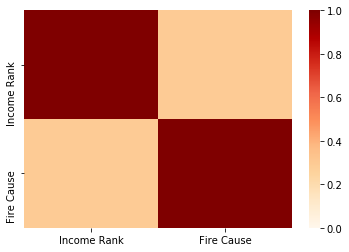

In [363]:
# create heatmap to visualize correlation between fire cause and income rank
cause_factor = [] 
for index in range(len(ca_county_list)):
    county_factor_list=[income_ranks[index], fire_causes[index]]
    cause_factor.append(county_factor_list)

cause_factor_df = pd.DataFrame(cause_factor, columns = ['Income Rank','Fire Cause'])
correlation_matrix = cause_factor_df.apply(lambda x : pd.factorize(x, sort=True)[0]).corr()

sns.heatmap(correlation_matrix, vmin = 0, vmax=1, cmap="OrRd")